# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [52]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [53]:
df = pd.read_csv('usuarios_win_mac_lin.csv')

In [54]:
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [55]:
df.paginas.value_counts()

1    80
2    55
3    11
4    10
5     7
6     4
9     2
7     1
Name: paginas, dtype: int64

In [56]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [57]:
print(df.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

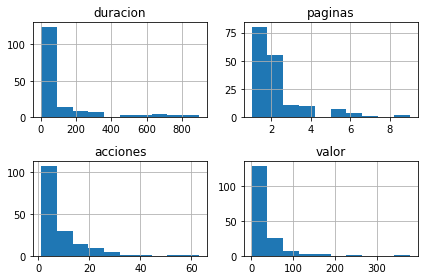

In [58]:
df.drop(['clase'], axis=1).hist()
plt.tight_layout() #Método dibujalo más bonito
plt.show();

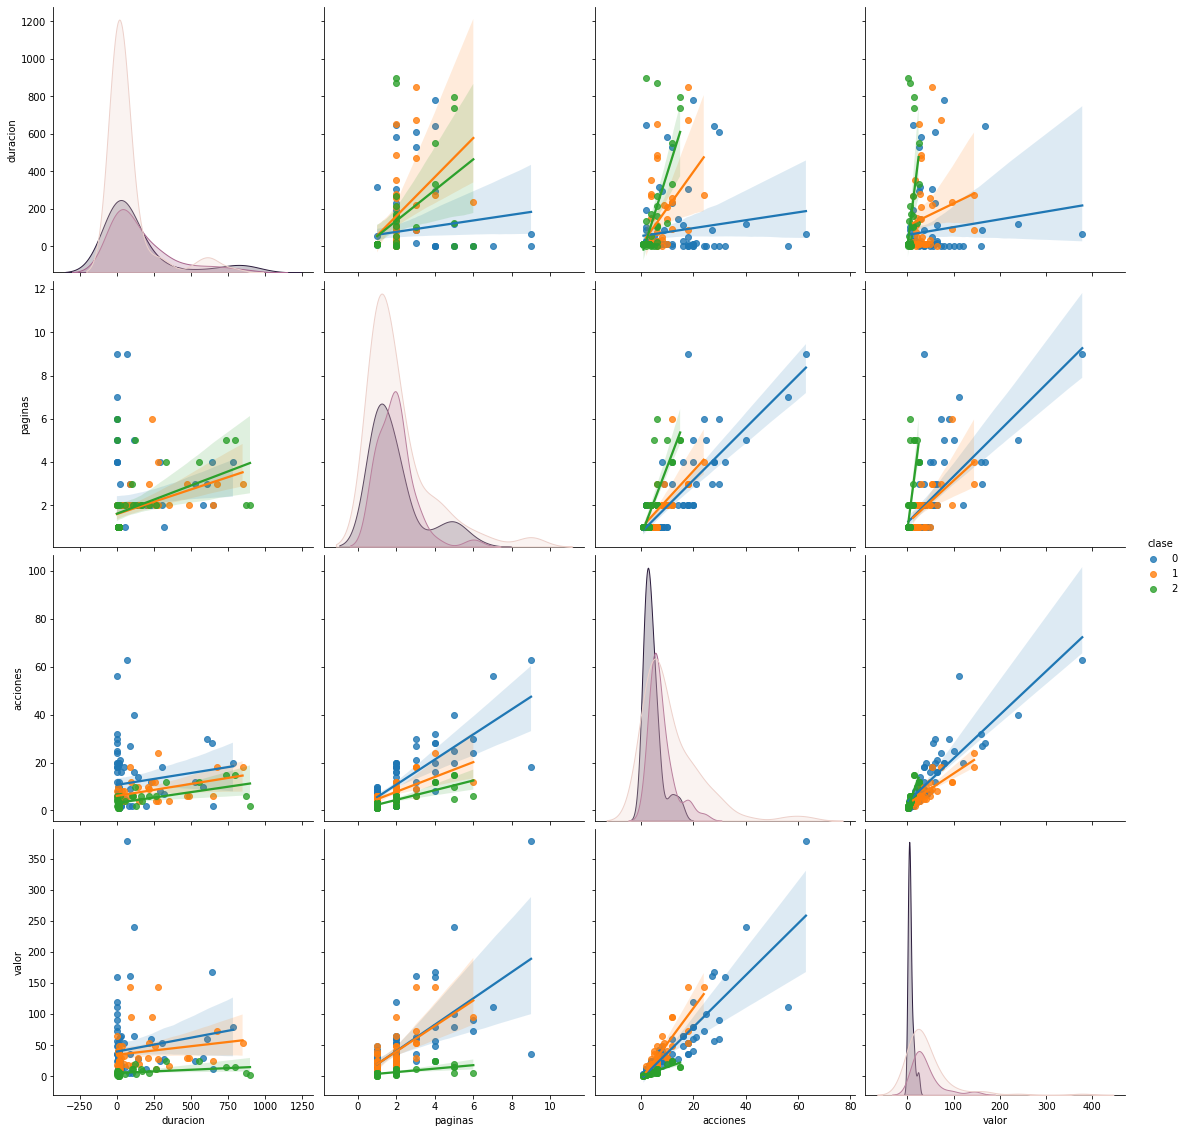

In [59]:
sns.pairplot(df.dropna(),
            hue='clase',
            height= 4,
            vars=['duracion', 'paginas','acciones','valor'],
            kind='reg') #'reg' ==> regresión lineal

## Creamos el modelo

In [26]:
df.drop(['clase'], axis=1)

,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


In [60]:
#En este caso no dividimos en train, test. Es un ejemplo

X = np.array(df.drop(['clase'], axis=1))
y = np.array(df['clase'])


#IMPORTANTE. En sklearn, muchos métodos funcionan muy bien con pandas, pero SEGURO que funcionan con NUMPY.array()

In [61]:
X.shape

(170, 4)

In [62]:
y.shape

(170,)

In [63]:
from sklearn import linear_model

model = linear_model.LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
predictions = model.predict(X)

In [65]:
predictions #array_numpy

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
predic_proba = model.predict_proba(X)
np.round(predic_proba,2)

#Array que representa los registros de usuarios y la probabilidad de pertenercer a una u otra clase

array([[0.34, 0.14, 0.53],
       [0.34, 0.05, 0.61],
       [0.25, 0.1 , 0.65],
       [0.28, 0.12, 0.6 ],
       [0.39, 0.12, 0.49],
       [0.31, 0.06, 0.63],
       [0.15, 0.22, 0.63],
       [0.34, 0.13, 0.53],
       [0.22, 0.18, 0.61],
       [0.27, 0.09, 0.65],
       [0.26, 0.15, 0.59],
       [0.38, 0.06, 0.56],
       [0.21, 0.1 , 0.69],
       [0.18, 0.04, 0.78],
       [0.05, 0.31, 0.64],
       [0.34, 0.14, 0.52],
       [0.13, 0.08, 0.79],
       [0.63, 0.35, 0.03],
       [0.57, 0.43, 0.  ],
       [0.75, 0.25, 0.  ],
       [0.72, 0.28, 0.  ],
       [0.39, 0.61, 0.  ],
       [0.85, 0.15, 0.  ],
       [0.4 , 0.6 , 0.  ],
       [0.82, 0.18, 0.  ],
       [0.35, 0.65, 0.  ],
       [0.07, 0.93, 0.  ],
       [0.76, 0.24, 0.  ],
       [0.35, 0.55, 0.1 ],
       [0.58, 0.42, 0.  ],
       [0.26, 0.73, 0.  ],
       [0.15, 0.85, 0.  ],
       [0.21, 0.79, 0.  ],
       [0.15, 0.85, 0.  ],
       [0.72, 0.28, 0.  ],
       [0.2 , 0.15, 0.65],
       [0.23, 0.18, 0.59],
 

In [67]:
model.score(X,y) #Accuracy

0.7764705882352941

# Adicional: Validación del Modelo

In [124]:
validation_size = 0.20
seed = 42
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size= validation_size,                                                                                 random_state = seed)
                                                                

In [126]:
X_train[0]

array([293.,   4.,   8.,  24.])

In [72]:
name = 'Logistic Regression'

kfold = model_selection.KFold(n_splits=10) 
#n_splits ==> mis registros me los enpaquetas en 10 trozos/partes == 'Cross_Validation'

cv_results = model_selection.cross_val_score(model, #Modelo de 'Logistic_Regression'
                                            X_train, y_train, # Los datos entrenamiento
                                            cv=kfold, #Es el objeto KFold para el 'Cross_Validation'
                                            scoring= 'accuracy') #Que métrica seleccionada

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

In [73]:
cv_results

array([0.92857143, 0.64285714, 0.64285714, 0.78571429, 0.85714286,
       0.78571429, 0.92307692, 0.61538462, 0.76923077, 0.46153846])

In [74]:
print(msg)

Logistic Regression: 0.741209 (0.141337)


In [ ]:
#Accuracy es una variable aleatoria con una muestra de 10 datos (cv_results)

#cv_results.mean() y cv_results.std()) ===> dá distribución gaussiana, y muestra densidad de probabilidad

#cv_results, si tuviera más datos generaría una campana de gauss

In [75]:
print(cv_results)
print(msg)


[0.92857143 0.64285714 0.64285714 0.78571429 0.85714286 0.78571429
 0.92307692 0.61538462 0.76923077 0.46153846]
Logistic Regression: 0.741209 (0.141337)


In [ ]:
''' 
lg1 = model.fit(X_train, y_train) ==> 0.92 (lg1.score())
lg2 = model.fit(X_train, y_train) ==> 0.64 (lg2.score())
.
.
.
lg10 = model.fit(X_train, y_train) ==> 0.46 (lg10.score())
                                                            '''

In [78]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.6470588235294118


In [79]:
model.predict(X_test)

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2], dtype=int64)

In [81]:
acierto = accuracy_score(y_test,predictions)

error = 1 - acierto

In [85]:
print('Acierto:',round(acierto*100,2),'%')
print('Error:',round(error*100,2),'%')

Acierto: 64.71 %
Error: 35.29 %


In [ ]:
# fold, STRATIFIED (estratificado), pero que en cada grupo 'fold' coincida la misma proporción de cada grupo. Método: Leave_One_Out Cross-Validation (LOOCV)

## Reporte de Resultados

In [100]:
c_matrix = confusion_matrix(y_test, predictions)

c_matrix

# En vertical las predicciones, en horizontal la realidad

array([[13,  2,  1],
       [ 9,  3,  0],
       [ 0,  0,  6]], dtype=int64)

Text(33.0, 0.5, 'Real')

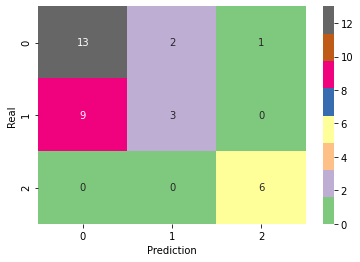

In [103]:
import seaborn as sns   

sns.heatmap(c_matrix, annot=True, cmap='Accent')
plt.xlabel('Prediction')
plt.ylabel('Real')



In [111]:
np.around((c_matrix / len(X_test))*100,decimals=0, out=None)

array([[38.,  6.,  3.],
       [26.,  9.,  0.],
       [ 0.,  0., 18.]])

<AxesSubplot:>

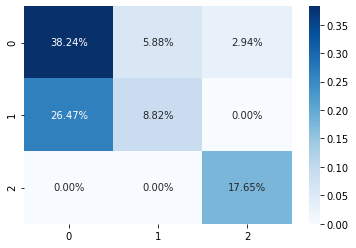

In [118]:
sns.heatmap(c_matrix/c_matrix.sum(), annot=True, 
            fmt='.2%', cmap='Blues')

Text(33.0, 0.5, 'Real')

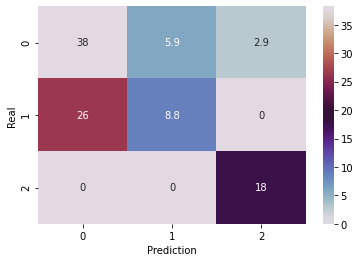

In [122]:
sns.heatmap(np.around((c_matrix / len(X_test))*100,decimals=2, out=None), annot=True, cmap='twilight')
plt.xlabel('Prediction')
plt.ylabel('Real')

[Nice confusion matrix catalog visuals examples](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

# Clasificación de nuevos registros

In [141]:
#duración ==> 10
#paginas ==> 3
#acciones ==> 5
#valor ==> 9

new = np.array([[10,3,5,9]])
print(new.shape)


model.predict(new)

(1, 4)


array([2], dtype=int64)